# OpenCV Filters HDMI

In this notebook, several filters will be applied to HDMI input images.

Those input sources and applied filters will then be displayed either directly in the notebook or on HDMI output.

To run all cells in this notebook a HDMI input source and HDMI output monitor are required.  

## 1. Start HDMI input and output 
### Step 1: Load the overlay

In [1]:
from pynq import Overlay
Overlay("base.bit").download()

### Step 2: Initialize HDMI I/O

In [2]:
from pynq.drivers.video import HDMI
hdmi_out = HDMI('out')
hdmi_in = HDMI('in', frame_list=hdmi_out.frame_list)
hdmi_in.start()
hdmi_out.start()

### Step 3: Show HDMI input frame within notebook using IPython Image

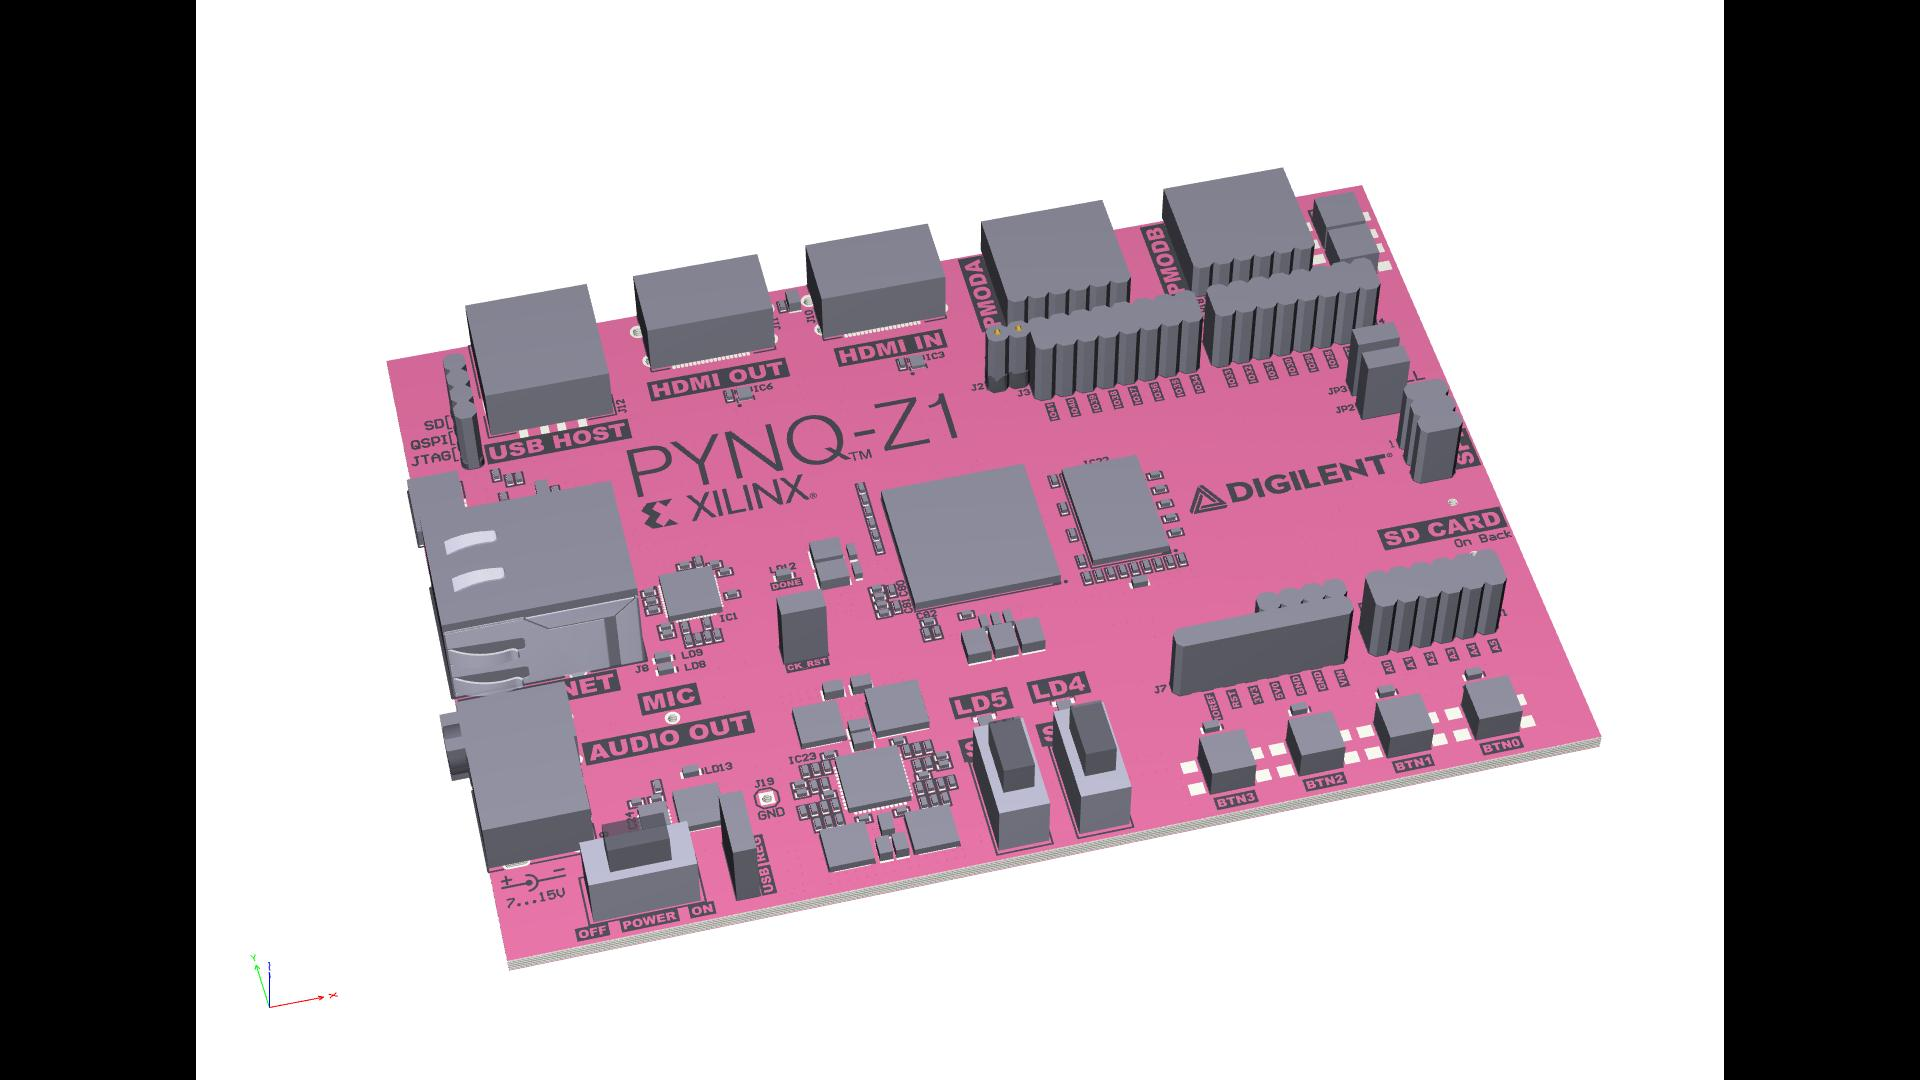

In [3]:
from IPython.display import Image
frame = hdmi_in.frame()
orig_img_path = '/home/xilinx/jupyter_notebooks/Examples/' + \
                'data/opencv_filters.jpg'
frame.save_as_jpeg(orig_img_path)

Image(filename=orig_img_path)

## 2. Applying OpenCV filters on HMDI input

### Step 1: Disconnect HDMI out from HDMI in
The `hdmi_in` will now stream to different frame buffer (no longer connected to `hdmi_out`).

In [5]:
hdmi_in.frame_index_next()

2

### Step 2: Edge detection
Detecting edges on HDMI in and display on HDMI out with Laplacian filter.

In [6]:
import time
import cv2
import numpy as np

num_frames = 20

start = time.time()

for i in range (num_frames):    
    np_frame= (np.frombuffer(hdmi_in.frame_raw(), 
                             dtype=np.uint8)).reshape(1080,1920,3)
    laplacian_frame = cv2.Laplacian(np_frame, cv2.CV_8U) 
    hdmi_out.frame_raw(bytearray(laplacian_frame))
    
end = time.time()

print("Frames per second:  " + str((num_frames) / (end - start)))

Frames per second:     1.3531336188632361


### Step 3: Show same results within notebook
Output OpenCV results as JPEG.

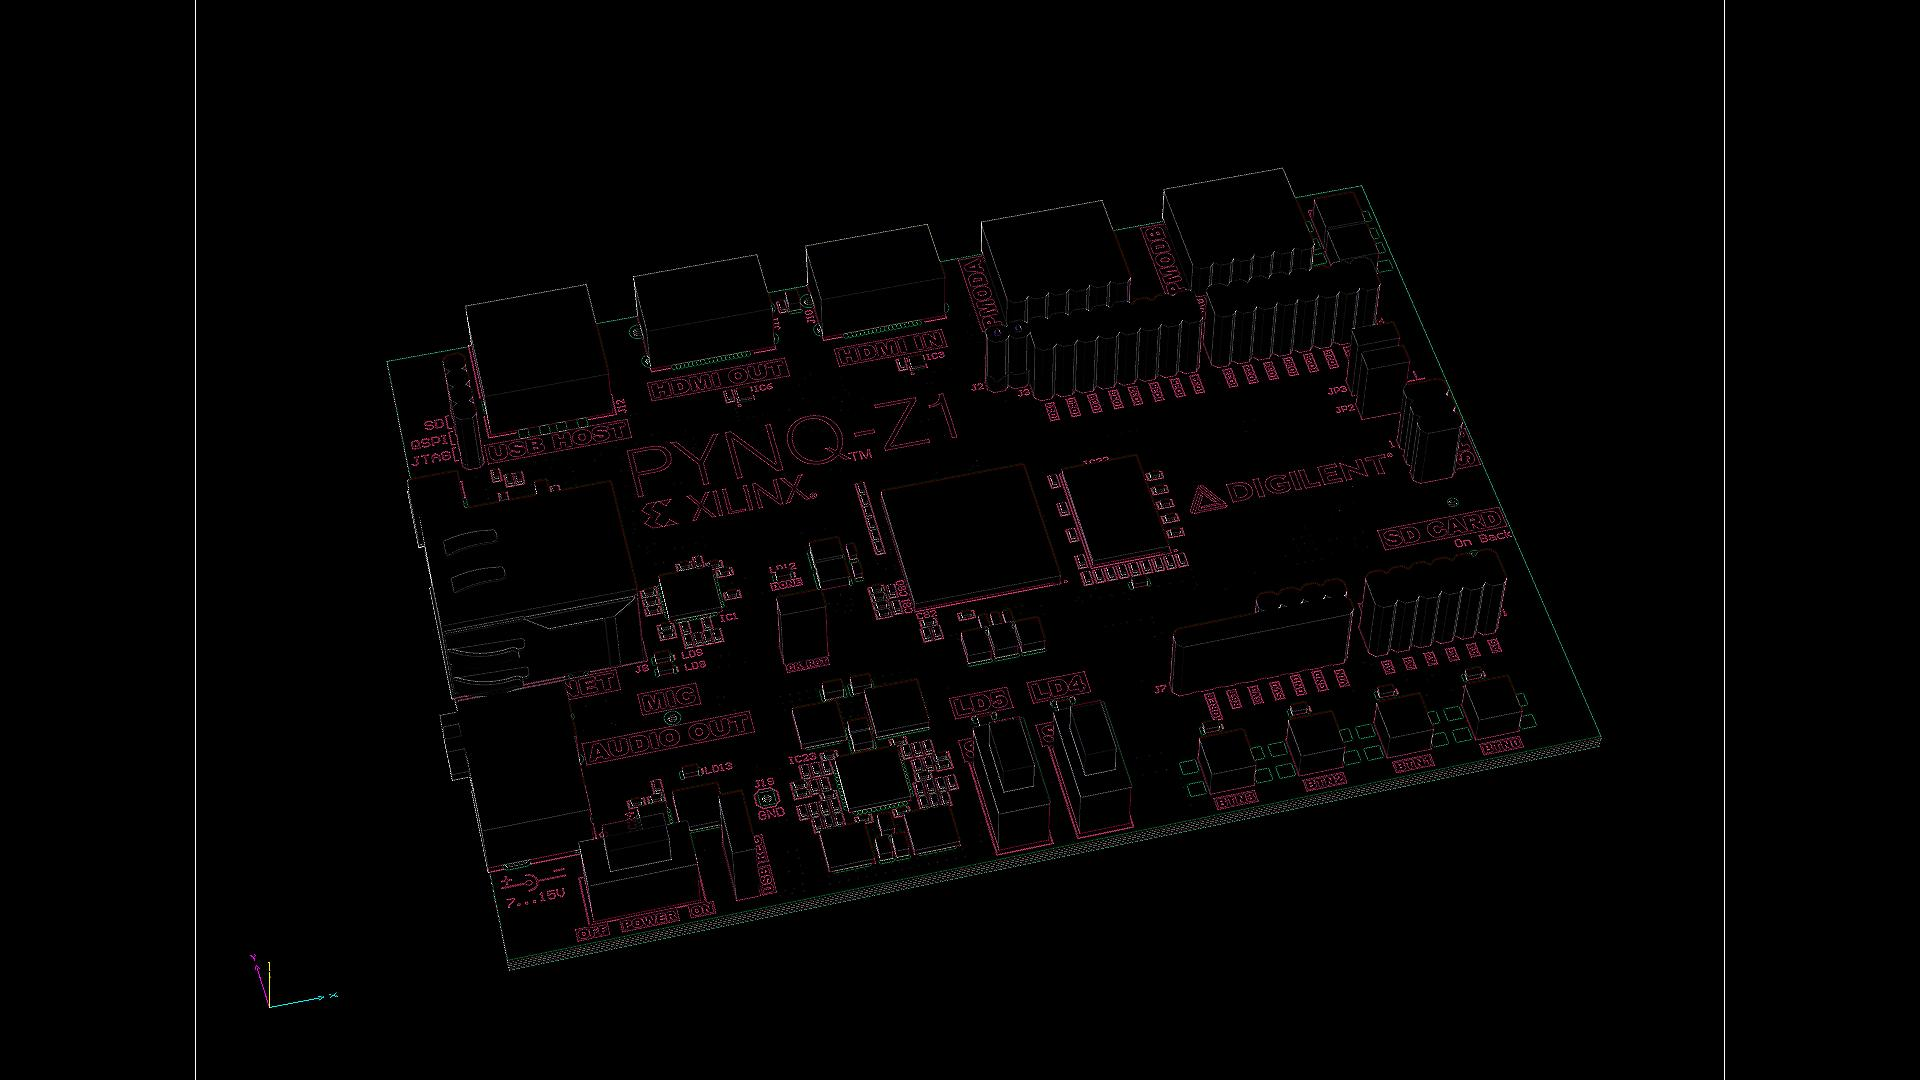

In [7]:
orig_img_path = '/home/xilinx/jupyter_notebooks/Examples/' + \
                'data/opencv_filters.jpg'
hdmi_out.frame().save_as_jpeg(orig_img_path)

Image(filename=orig_img_path)

### Step 4: Edge detection
Detecting edges on HDMI in and display on HDMI out with Canny Edge filter.

Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded. 

In [8]:
import time
import cv2
import numpy as np

num_frames = 20

start = time.time()

for i in range (num_frames):
    # read next image
    np_frame= (np.frombuffer(hdmi_in.frame_raw(), 
                             dtype=np.uint8)).reshape(1080,1920,3)
    frame_canny = cv2.Canny(np_frame,100,110)
    np_frame[:,:,0] = frame_canny[:,:]
    np_frame[:,:,1] = frame_canny[:,:]
    np_frame[:,:,2] = frame_canny[:,:]

    # copy to frame buffer / show on monitor
    hdmi_out.frame_raw(bytearray(np_frame))

end = time.time()
print("Frames per second:  " + str((num_frames) / (end - start)))

Frames per second:     0.8328865616335941


## 3. Release HDMI

In [15]:
hdmi_out.stop()
hdmi_in.stop()
del hdmi_in, hdmi_out